In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


In [77]:
df=pd.read_csv('/content/ToyotaCorolla - MLR.csv')

In [78]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [79]:
df.shape

(1436, 11)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


##Tasks:
1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.


In [81]:
###missing values
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [82]:
df.duplicated().sum()

np.int64(1)

In [83]:
df.drop_duplicates(ignore_index=True,inplace=True)

In [84]:
df.duplicated().sum()
### clear all duplicates

np.int64(0)

In [85]:
df = df.drop(columns=['Cylinders', 'Gears'])

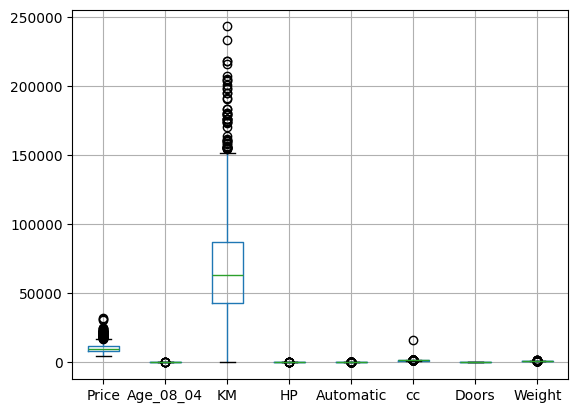

In [86]:
### check for outleirs
df.boxplot()
plt.show()

In [87]:
### outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)


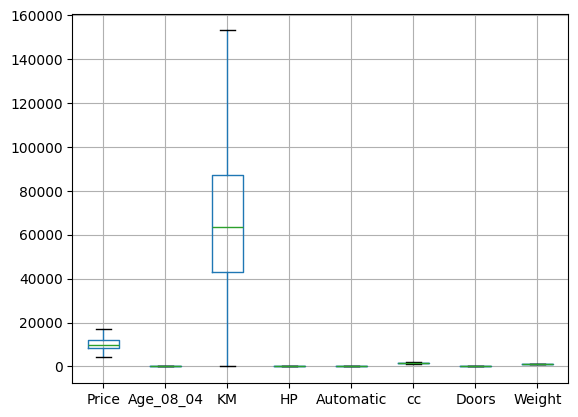

In [88]:
df.boxplot()
plt.show()

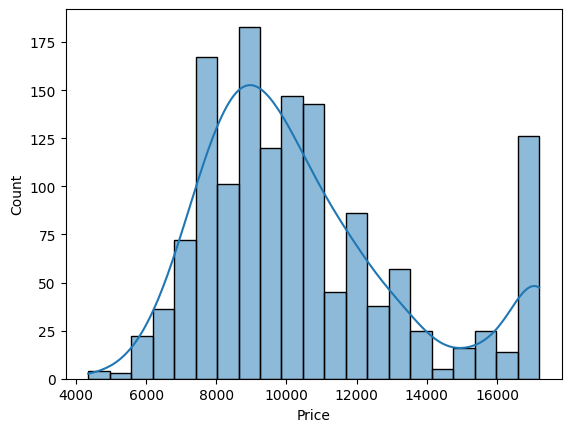

In [89]:
sns.histplot(df['Price'],kde=True)
plt.show()

In [90]:
df['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,1264
Diesel,154
CNG,17


In [91]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000,1435.000000
mean,10495.964460,55.992334,67644.520383,101.093380,0.0,1558.327526,4.032753,1068.520906
std,2977.598549,18.529725,34725.393258,13.146145,0.0,168.788311,0.952667,37.722708
min,4350.000000,5.000000,1.000000,69.000000,0.0,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.0,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.0,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.0,1600.000000,5.000000,1085.000000
max,17200.000000,80.000000,153103.750000,140.000000,0.0,1900.000000,5.000000,1152.500000


In [92]:
numerical_cols = ['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight', 'Price']
correlation_matrix = df[numerical_cols].corr()
correlation_matrix

,Age_08_04,KM,HP,cc,Doors,Weight,Price
Age_08_04,1.000000,0.530670,-0.129602,-0.136644,-0.146704,-0.476150,-0.895340
KM,0.530670,1.000000,-0.329729,0.258680,-0.036618,0.000977,-0.607949
HP,-0.129602,-0.329729,1.000000,0.098192,0.120139,0.024877,0.254427
cc,-0.136644,0.258680,0.098192,1.000000,0.138433,0.717782,0.129352
Doors,-0.146704,-0.036618,0.120139,0.138433,1.000000,0.381177,0.183010
Weight,-0.476150,0.000977,0.024877,0.717782,0.381177,1.000000,0.507823
Price,-0.895340,-0.607949,0.254427,0.129352,0.183010,0.507823,1.000000


In [93]:
correlation_matrix['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Weight,0.507823
HP,0.254427
Doors,0.183010
cc,0.129352
KM,-0.607949
Age_08_04,-0.895340


Text(0.5, 1.0, 'Age_08_04 vs Price')

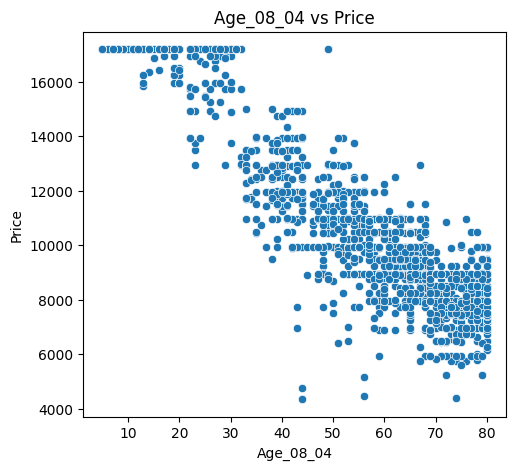

In [94]:
# Visualization (Scatter plots for top correlated features)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age_08_04', y='Price', data=df)
plt.title('Age_08_04 vs Price')


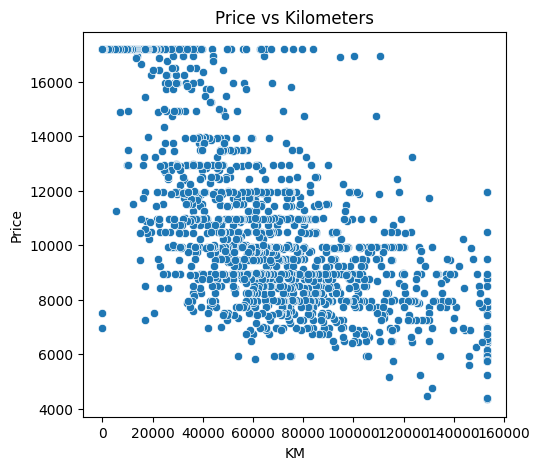

In [95]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.scatterplot(x='KM', y='Price', data=df)
plt.title('Price vs Kilometers')
plt.show()

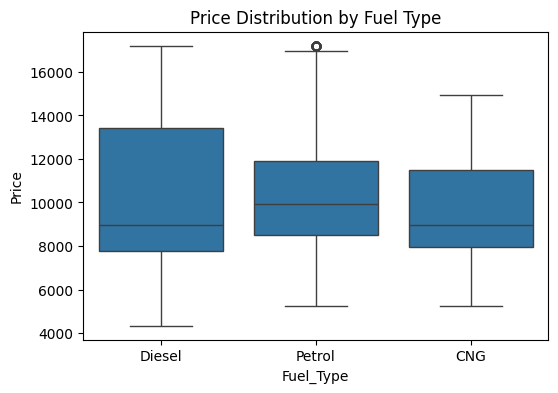

In [96]:
# Visualization (Price distribution by Fuel Type)
plt.figure(figsize=(6, 4))
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title('Price Distribution by Fuel Type')
plt.show()

In [97]:
X = df.drop('Price', axis=1)
y = df['Price']

In [98]:
# Identify column types
categorical_cols = ['Fuel_Type']
numerical_cols = X.select_dtypes(include=np.number).columns

In [99]:
# Use ColumnTransformer for robust preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough' # Keep numerical columns as is
)

In [100]:
# Apply transformation
X_processed = preprocessor.fit_transform(X)

In [101]:
# Get feature names after one-hot encoding
numerical_cols = X.select_dtypes(include=np.number).columns
cat_features = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
numerical_cols_reordered = ['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Weight']
feature_names = cat_features + list(numerical_cols_reordered)
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

In [102]:
X_processed_df.head()

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Age_08_04,KM,HP,Automatic,cc,Doors,Weight
0,0.0,1.0,0.0,23.0,46986.0,90.0,0.0,1900.0,3.0,1152.5
1,0.0,1.0,0.0,23.0,72937.0,90.0,0.0,1900.0,3.0,1152.5
2,0.0,1.0,0.0,24.0,41711.0,90.0,0.0,1900.0,3.0,1152.5
3,0.0,1.0,0.0,26.0,48000.0,90.0,0.0,1900.0,3.0,1152.5
4,0.0,1.0,0.0,30.0,38500.0,90.0,0.0,1900.0,3.0,1152.5


2.Split the dataset into training and testing sets

In [103]:
target=df[['Price']]
features=df.drop(columns=(['Price']))

In [104]:
# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed_df, y, test_size=0.2, random_state=42
)
print(X_train.shape)
print(X_test.shape)

(1148, 10)
(287, 10)


3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.

4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.


model 1

In [105]:
#1. Multiple Linear Regression (MLR)
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [106]:
#2. Decision Tree Regression
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [107]:
#3. Random Forest Regression
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [108]:
# List models for iteration
models = {
    'Linear Regression': mlr,
    'Decision Tree Regressor': dtr,
    'Random Forest Regressor': rfr
}

evaluation_results = {}

print("\n--- Model Evaluation (Testing Set) ---")
print("| Model Name           | R-squared | RMSE      |")
print("|:---------------------|:----------|:----------|")

for name, model in models.items():
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    evaluation_results[name] = {'R2': r2, 'RMSE': rmse}

    print(f"| {name:<20} | {r2:.4f} | {rmse:.2f} |")


--- Model Evaluation (Testing Set) ---
| Model Name           | R-squared | RMSE      |
|:---------------------|:----------|:----------|
| Linear Regression    | 0.8505 | 1129.21 |
| Decision Tree Regressor | 0.7725 | 1392.80 |
| Random Forest Regressor | 0.8772 | 1023.17 |


5.Apply Lasso and Ridge methods on the model.

In [109]:
categorical_cols = ['Fuel_Type']
numerical_cols_for_scaling = X.select_dtypes(include=np.number).columns.tolist()

In [110]:
# Define feature names (to avoid downstream errors)
cat_features = pd.get_dummies(df[categorical_cols]).columns.tolist()
feature_names = cat_features + numerical_cols_for_scaling

In [111]:
# Setup Column Transformer for Standardization (Essential for Lasso/Ridge)
preprocessor_scaled = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
        ('num', StandardScaler(), numerical_cols_for_scaling)
    ],
    remainder='drop'
)

In [112]:
# Apply Scaling and Split (This defines X_train_scaled, etc.)
X_scaled = preprocessor_scaled.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42
)

In [113]:
# Ridge Regression (L2 Penalty)
ridge = Ridge(alpha=10.0, random_state=42)
ridge.fit(X_train_scaled, y_train_scaled)

Ridge(alpha=10.0, random_state=42)

In [114]:
# Ridge Evaluation
y_pred_ridge = ridge.predict(X_test_scaled)
r2_ridge = r2_score(y_test_scaled, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test_scaled, y_pred_ridge))
print(f"Ridge Regression - R-squared: {r2_ridge:.4f}, RMSE: {rmse_ridge:.2f}")

Ridge Regression - R-squared: 0.8493, RMSE: 1133.49


In [115]:
# Lasso Regression
lasso = Lasso(alpha=100.0, random_state=42, max_iter=10000)
lasso.fit(X_train_scaled, y_train_scaled)

Lasso(alpha=100.0, max_iter=10000, random_state=42)

In [116]:
# Lasso Evaluation
y_pred_lasso = lasso.predict(X_test_scaled)
r2_lasso = r2_score(y_test_scaled, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test_scaled, y_pred_lasso))
print(f"Lasso Regression - R-squared: {r2_lasso:.4f}, RMSE: {rmse_lasso:.2f}")

Lasso Regression - R-squared: 0.8464, RMSE: 1144.68


###Interview Questions:

1.What is Normalization & Standardization and how is it helpful?



Both Normalization and Standardization are essential data preprocessing techniques used to rescale numerical features so they contribute equally to a machine machine learning model, thereby preventing features with naturally larger values (like Kilometers) from disproportionately dominating the learning process. Standardization (Z-Score Scaling) achieves this by transforming the data so that it has a mean of zero and a standard deviation of one ($z = \frac{(x - \mu)}{\sigma}$), which is crucial for algorithms like Ridge and Lasso Regression because the penalty term is sensitive to the magnitude of the features.  Normalization (Min-Max Scaling) rescales the data to a fixed range, typically between zero and one, which can be useful when preserving the relationships of non-normally distributed data or when specific boundary limits are required.

2.What techniques can be used to address multicollinearity in multiple linear regression?

Multicollinearity occurs when two or more predictor variables are highly correlated with each other in a multiple linear regression model, leading to unstable and unreliable coefficient estimates. To address this issue, the first step is often detection using the Variance Inflation Factor (VIF). Techniques to resolve it include Feature Exclusion, where the redundant variable is removed, or Feature Combination, where correlated variables are merged into a single index. The most robust methods involve Regularization, specifically Ridge Regression (L2 penalty), which stabilizes the model by shrinking coefficients, and Lasso Regression (L1 penalty), which simplifies the model by forcing the coefficients of non-essential, correlated features exactly to zero, effectively performing feature selection.